In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

import numpy as np
import matplotlib.pyplot as plt  # для графиков
import seaborn as sns

In [2]:
MAIN_FOLDER = "/home/arman/it/AI_work/machine/titanic"

In [3]:
data = pd.read_csv(f"{MAIN_FOLDER}/data/train.csv")

print(f"Размер обучающих данных: {data.shape}")
print(data.head(3))

Размер обучающих данных: (8693, 14)
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

   Transported  
0        False  
1         True  
2        False  


In [4]:
data = data.drop(columns=["PassengerId", "Cabin", "Name"])
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [5]:
print(data["HomePlanet"].unique())
print(data["Destination"].unique())
data = pd.get_dummies(data, columns=["HomePlanet", "Destination"], drop_first=True)

['Europa' 'Earth' 'Mars' nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


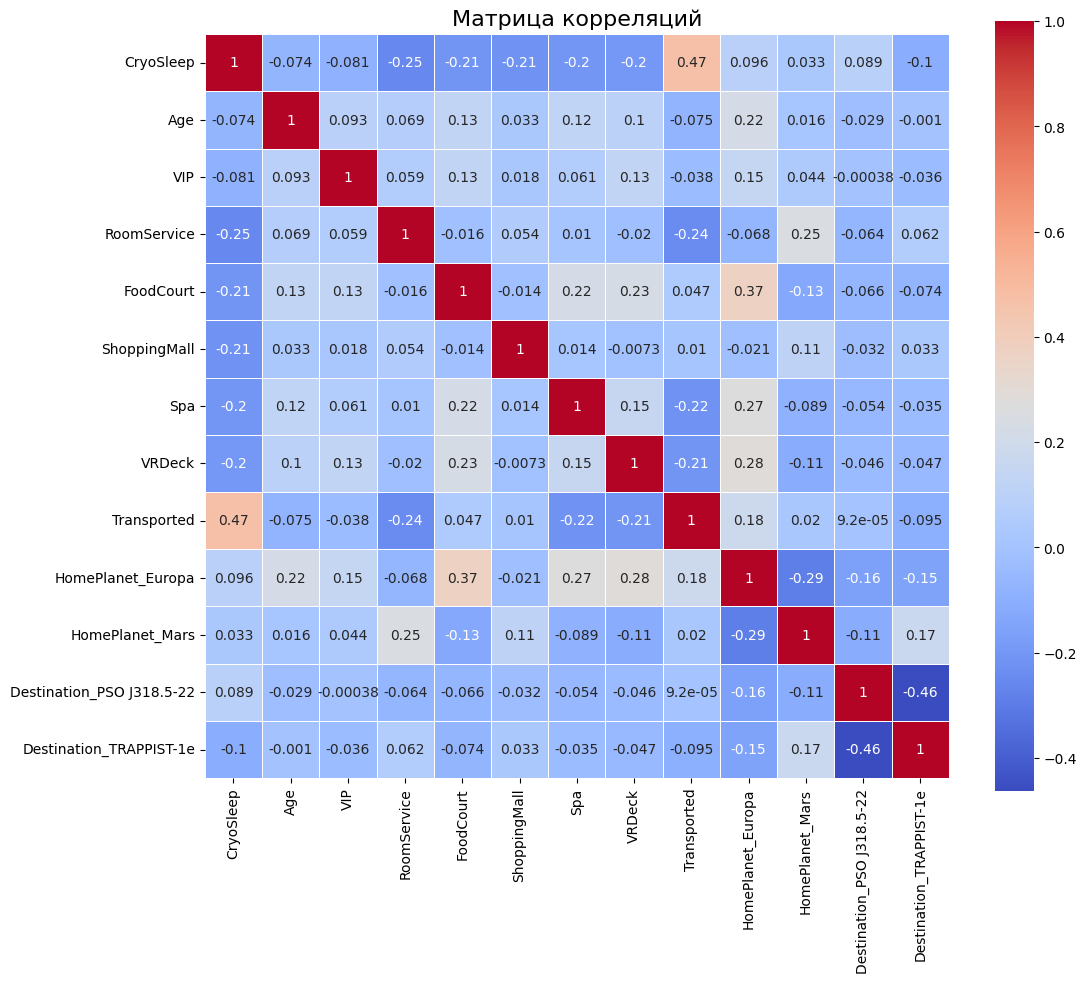

In [6]:
corr_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            square=True,
            linewidths=0.5)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

In [7]:
need_features = ["Destination_PSO J318.5-22", "HomePlanet_Mars"]
data.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'],
      dtype='object')

In [8]:
X = data[need_features].values
y = data['Transported'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)

f"{train_X.shape[0]=}, {test_X.shape[0]=}"

'train_X.shape[0]=7823, test_X.shape[0]=870'

In [9]:
model = XGBRegressor(n_estimators=10000, random_state=42)
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

# Оцениваем качество
mae = mean_absolute_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

print(f"  Ошибка на обучении (MAE): {mae:.2f} K")
print(f"  R² на проверке: {r2:.3f}")

  Ошибка на обучении (MAE): 0.50 K
  R² на проверке: -0.003
